In [30]:
pip install pycaret


In [31]:
from pycaret.classification import *


In [32]:
import pandas as pd

In [33]:
data=pd.read_csv("/content/drive/MyDrive/IntelliHack/Q1/weather_data.csv")

In [34]:
data.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [35]:
data.shape

(311, 7)

In [36]:
data.dtypes

,0
date,object
avg_temperature,float64
humidity,float64
avg_wind_speed,float64
rain_or_not,object
cloud_cover,float64
pressure,float64


In [37]:
data.isnull().sum()

,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [38]:
data.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752



Target Variable Distribution:
 rain_or_not
Rain       198
No Rain    113
Name: count, dtype: int64


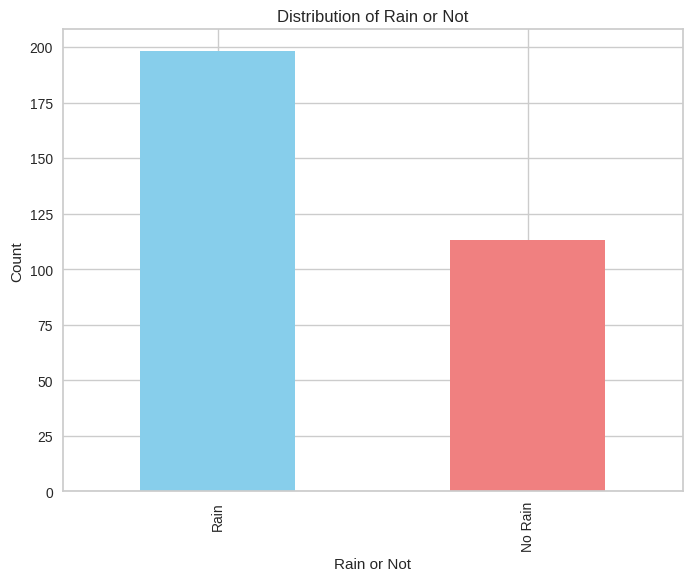

In [39]:
print("\nTarget Variable Distribution:\n", data['rain_or_not'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['rain_or_not'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Rain or Not')
plt.xlabel('Rain or Not')
plt.ylabel('Count')
plt.show()

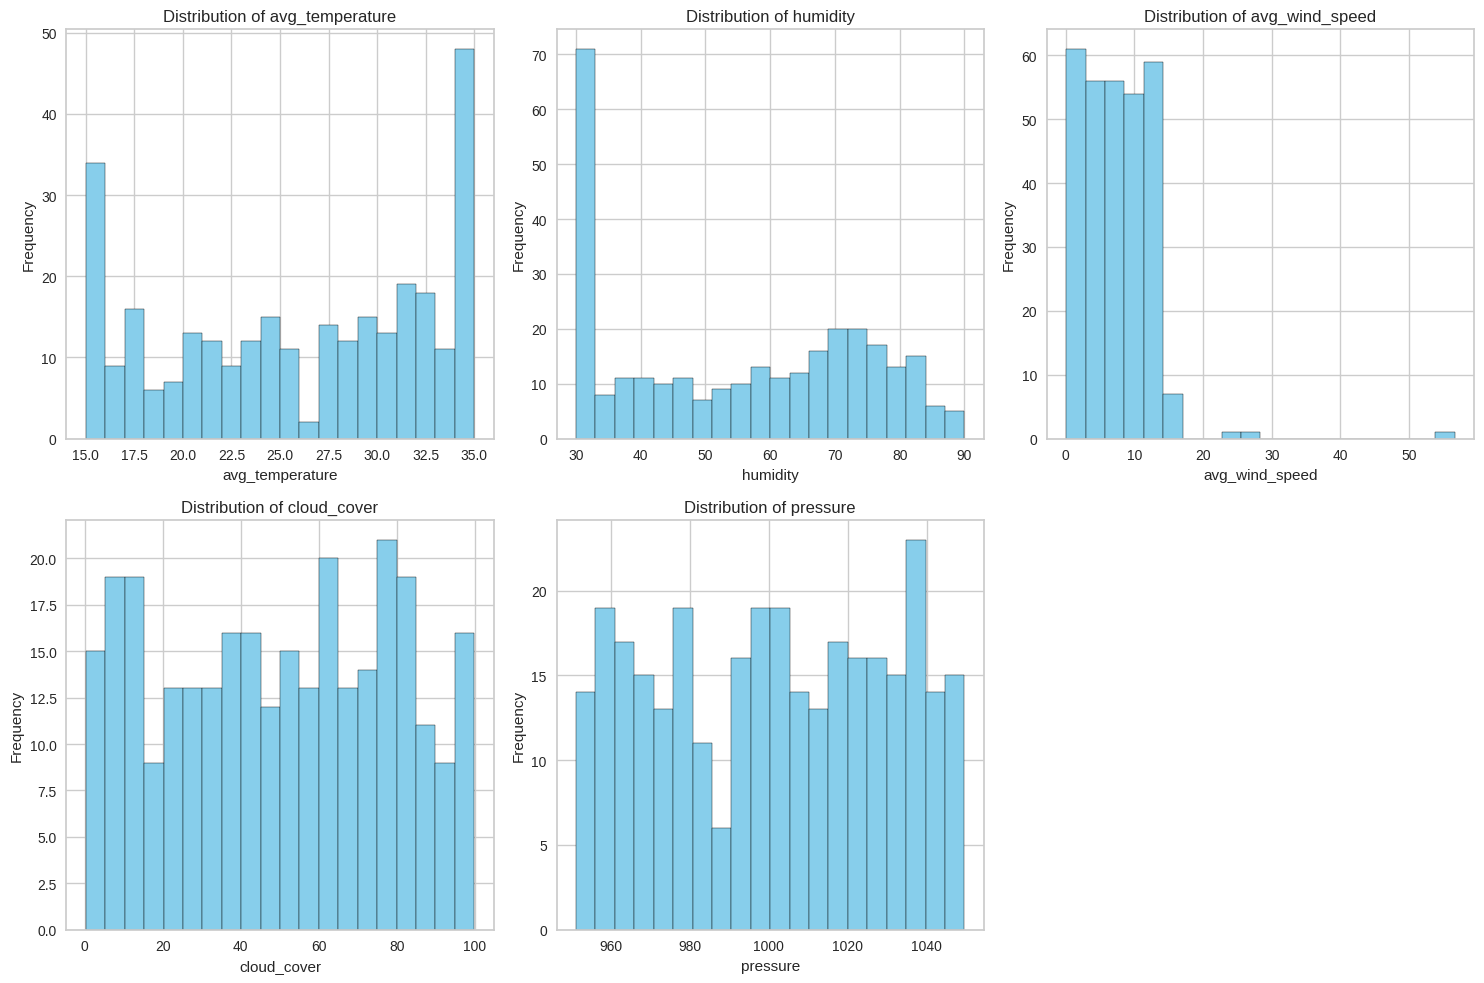


Correlation Matrix:
                  avg_temperature  humidity  avg_wind_speed  cloud_cover  \
avg_temperature         1.000000  0.902001        0.007954    -0.000502   
humidity                0.902001  1.000000       -0.006393    -0.064619   
avg_wind_speed          0.007954 -0.006393        1.000000    -0.005475   
cloud_cover            -0.000502 -0.064619       -0.005475     1.000000   
pressure               -0.011844  0.017740       -0.038578    -0.014923   

                 pressure  
avg_temperature -0.011844  
humidity         0.017740  
avg_wind_speed  -0.038578  
cloud_cover     -0.014923  
pressure         1.000000  


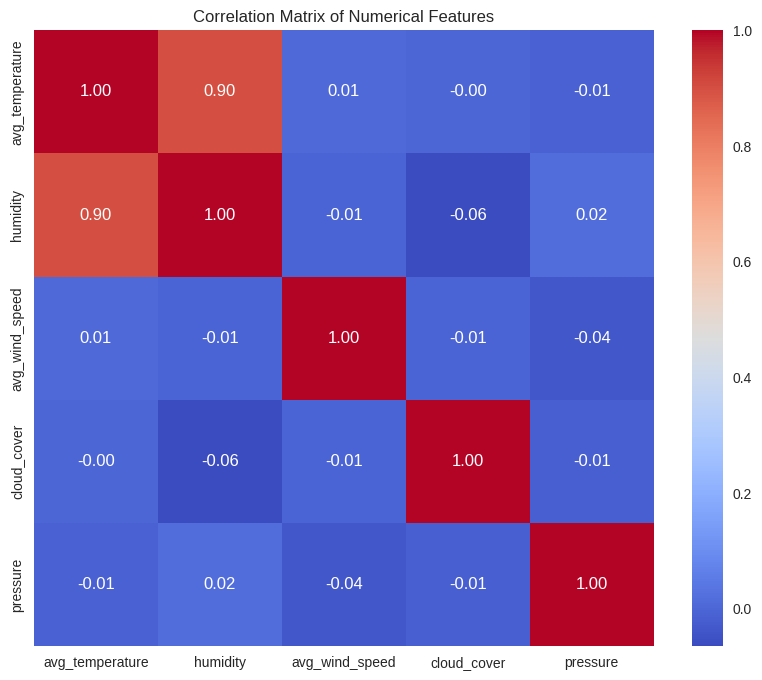

In [40]:
numerical_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

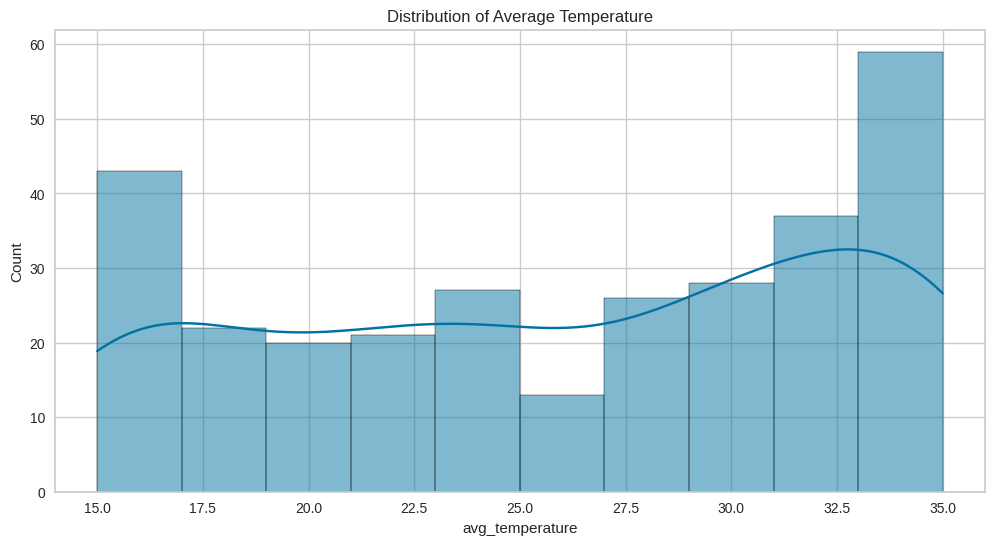

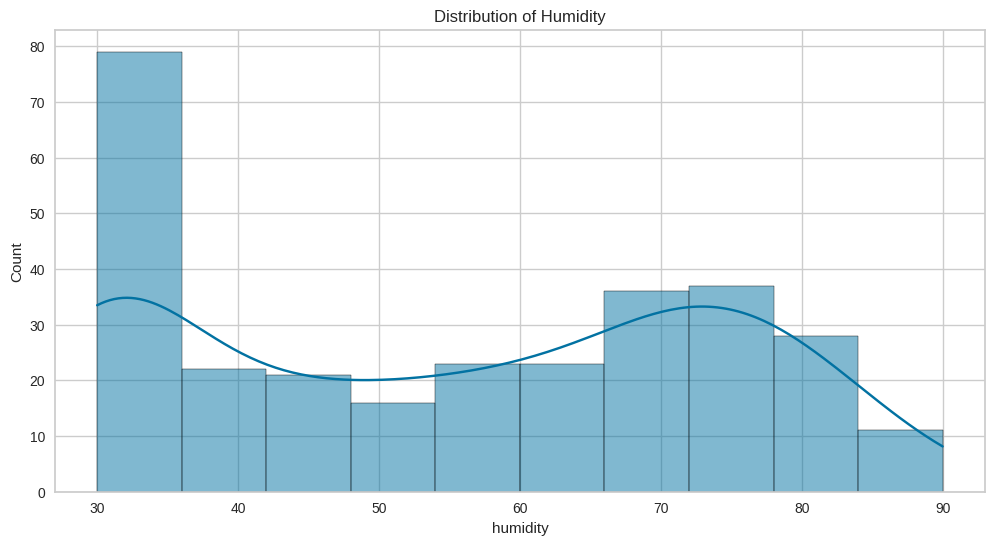

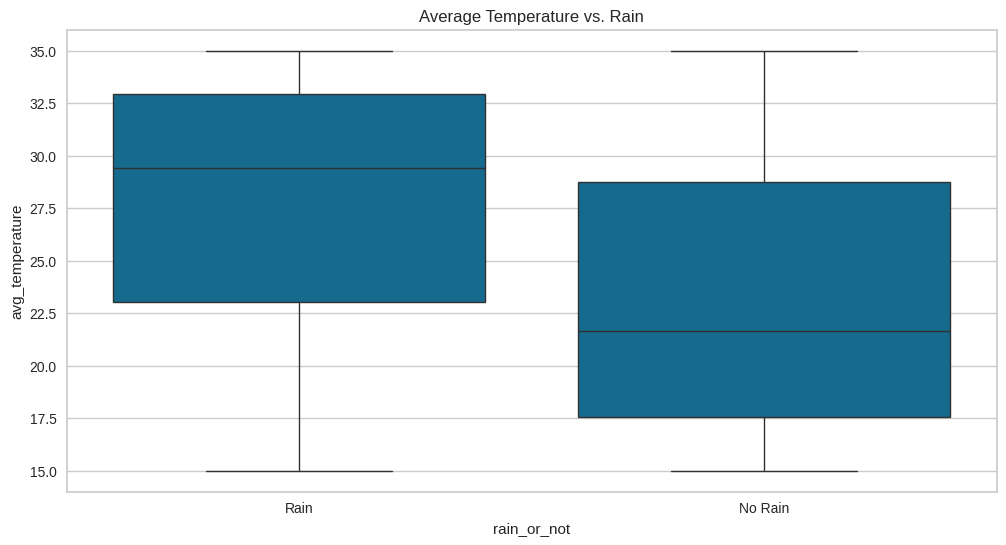

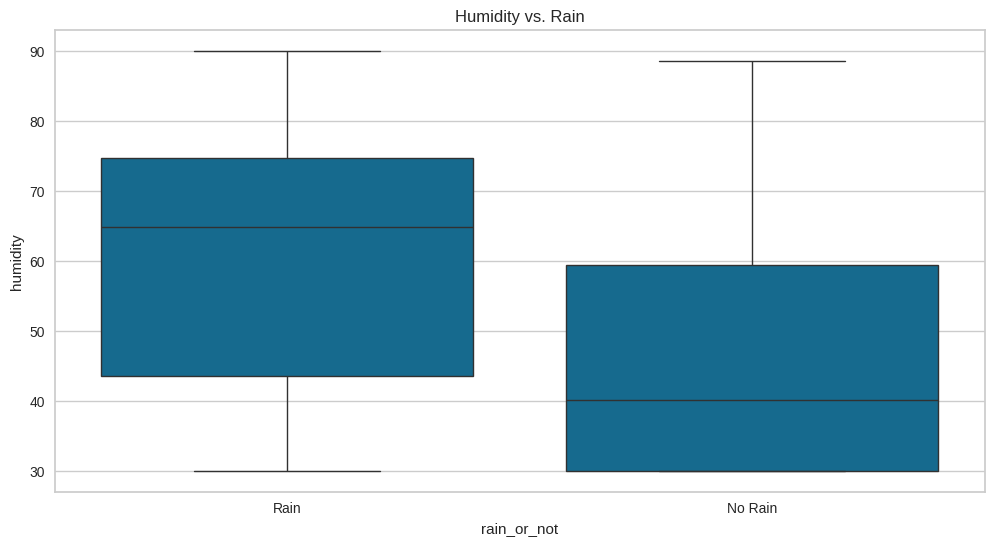

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(data['avg_temperature'], kde=True)
plt.title('Distribution of Average Temperature')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.show()

# Visualize the relationship between features and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='rain_or_not', y='avg_temperature', data=data)
plt.title('Average Temperature vs. Rain')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='rain_or_not', y='humidity', data=data)
plt.title('Humidity vs. Rain')
plt.show()

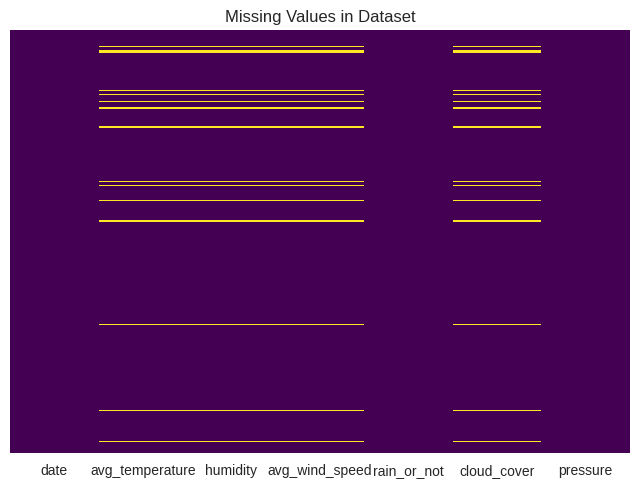

In [42]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [43]:
# Check rows where any of the selected columns have missing values
missing_rows = data[data[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']].isnull().any(axis=1)]
print(missing_rows)


           date  avg_temperature  humidity  avg_wind_speed rain_or_not  \
12   2023-01-13              NaN       NaN             NaN     No Rain   
15   2023-01-16              NaN       NaN             NaN        Rain   
16   2023-01-17              NaN       NaN             NaN     No Rain   
44   2023-02-14              NaN       NaN             NaN        Rain   
47   2023-02-17              NaN       NaN             NaN        Rain   
52   2023-02-22              NaN       NaN             NaN     No Rain   
57   2023-02-27              NaN       NaN             NaN        Rain   
71   2023-03-13              NaN       NaN             NaN     No Rain   
111  2023-04-22              NaN       NaN             NaN        Rain   
114  2023-04-25              NaN       NaN             NaN        Rain   
125  2023-05-06              NaN       NaN             NaN        Rain   
140  2023-05-21              NaN       NaN             NaN        Rain   
216  2023-08-05              NaN      

In [44]:
# Interpolate missing values for numerical columns
data[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']] = data[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']].interpolate(method='linear')

# Verify that no missing values remain
print(data.isnull().sum())  # Should print all zeros


date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
dtype: int64


In [45]:
# Basic info about dataset
print(data.info())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  311 non-null    float64
 2   humidity         311 non-null    float64
 3   avg_wind_speed   311 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      311 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB
None
       avg_temperature    humidity  avg_wind_speed  cloud_cover     pressure
count       311.000000  311.000000      311.000000   311.000000   311.000000
mean         26.068008   55.182861        7.524979    49.889761  1001.059119
std           6.761455   19.040509        5.250637    28.549246    28.835595
min          15.000000   30.000000        0.069480     0.321826   951.240404
25%          20.339312   35.385720     

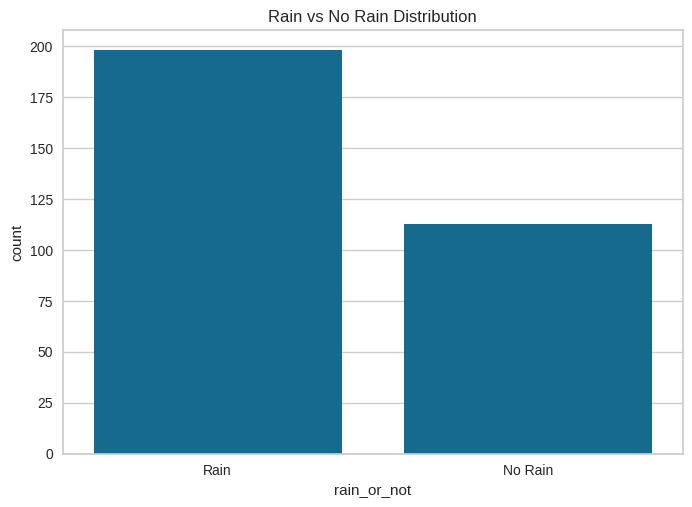

rain_or_not
Rain       63.665595
No Rain    36.334405
Name: proportion, dtype: float64


In [46]:

# Countplot for 'rain_or_not'
sns.countplot(x='rain_or_not', data=data)
plt.title('Rain vs No Rain Distribution')
plt.show()

# Percentage distribution
print(data['rain_or_not'].value_counts(normalize=True) * 100)


In [47]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


In [48]:
data['rain_or_not'] = data['rain_or_not'].map({'No Rain': 0, 'Rain': 1})


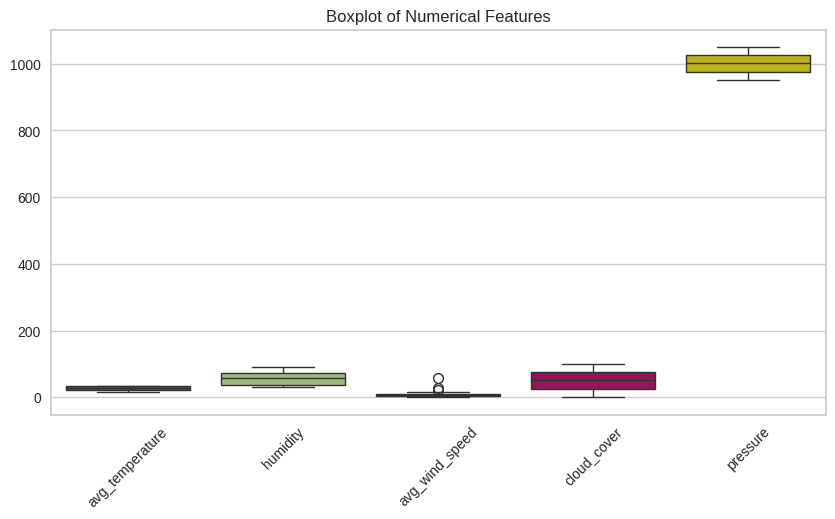

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=data.drop(columns=['rain_or_not']))
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

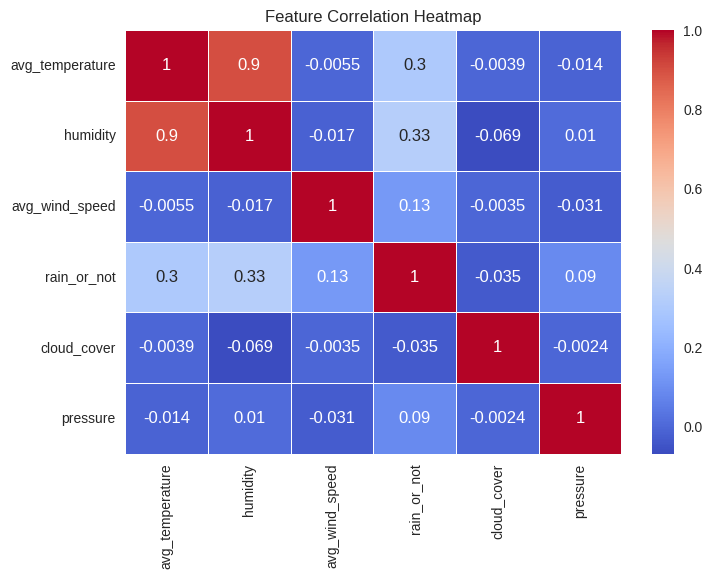

In [50]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [51]:
Q1 = data['avg_wind_speed'].quantile(0.25)
Q3 = data['avg_wind_speed'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['avg_wind_speed'] >= lower_bound) & (data['avg_wind_speed'] <= upper_bound)]


In [52]:
from scipy.stats.mstats import winsorize

data['avg_wind_speed'] = winsorize(data['avg_wind_speed'], limits=[0.05, 0.05])


In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Rain = 1, No Rain = 0)
label_encoder = LabelEncoder()
data['rain_or_not'] = label_encoder.fit_transform(data['rain_or_not'])


In [54]:
from sklearn.model_selection import train_test_split


# Define features and target variable
X = data.drop(columns=['rain_or_not'])  # Remove 'rain_or_not' column, 'date' is already the index
y = data['rain_or_not']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
data.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
date,,,,,,
2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Rain = 1, No Rain = 0)
label_encoder = LabelEncoder()
data['rain_or_not'] = label_encoder.fit_transform(data['rain_or_not'])


In [58]:
# Define features and target variable
X = data.drop(columns=['rain_or_not'])  # Remove 'rain_or_not' column, 'date' is already the index
y = data['rain_or_not']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# If you need to drop the index later, you can reset it:
# X = X.reset_index(drop=True)  # This removes the index and converts it to a regular column (optional)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6129032258064516


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5967741935483871


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.5806451612903226


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.5645161290322581


In [64]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.48      0.43      0.45        23
           1       0.68      0.72      0.70        39

    accuracy                           0.61        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.61      0.61      0.61        62

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53        23
           1       0.72      0.59      0.65        39

    accuracy                           0.60        62
   macro avg       0.59      0.60      0.59        62
weighted avg       0.63      0.60      0.60        62

Random Forest Report:
               precision    recall  f1-score   support

           0       0.42      0.35      0.38        23
           1       0.65      0.72      0.68        39

    accuracy                           0.58        62
   macro avg       0.54      0.53      0.53        62

In [65]:
# Load dataset into PyCaret
clf_setup = setup(data=data,
                  target='rain_or_not',
                  ignore_features=['date'],  # Ignore non-numeric columns
                  normalize=True,
                  session_id=42)  # Ensures reproducibility


,Description,Value
0,Session id,42
1,Target,rain_or_not
2,Target type,Binary
3,Original data shape,"(308, 6)"
4,Transformed data shape,"(308, 6)"
5,Transformed train set shape,"(215, 6)"
6,Transformed test set shape,"(93, 6)"
7,Ignore features,1
8,Numeric features,5
9,Preprocess,True


In [66]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7071,0.7133,0.7500,0.7915,0.7645,0.3734,0.3816,0.0360
knn,K Neighbors Classifier,0.6929,0.7050,0.8302,0.7271,0.7733,0.2985,0.3105,0.1350
lda,Linear Discriminant Analysis,0.6881,0.7113,0.7786,0.7576,0.7593,0.3083,0.3169,0.0280
ridge,Ridge Classifier,0.6833,0.7103,0.7934,0.7376,0.7577,0.2933,0.3022,0.0310
et,Extra Trees Classifier,0.6794,0.6804,0.8082,0.7237,0.7623,0.2715,0.2756,0.2760
lr,Logistic Regression,0.6788,0.7076,0.7934,0.7321,0.7565,0.2802,0.2860,1.3200
qda,Quadratic Discriminant Analysis,0.6786,0.6804,0.8077,0.7230,0.7583,0.2755,0.2867,0.0300
rf,Random Forest Classifier,0.6656,0.6647,0.7940,0.7148,0.7510,0.2425,0.2446,0.1970
xgboost,Extreme Gradient Boosting,0.6654,0.6609,0.7791,0.7209,0.7463,0.2522,0.2573,0.0880
gbc,Gradient Boosting Classifier,0.6563,0.6257,0.7571,0.7172,0.7354,0.2410,0.2421,0.1360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [67]:
# Create the best model found
final_model = create_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.7946,0.7857,0.8462,0.8148,0.5217,0.5241
1,0.6818,0.4732,0.8571,0.7059,0.7742,0.2524,0.2665
2,0.6818,0.7143,0.7857,0.7333,0.7586,0.2936,0.2951
3,0.8182,0.7946,0.8571,0.8571,0.8571,0.6071,0.6071
4,0.5455,0.6071,0.7143,0.6250,0.6667,-0.0377,-0.0386
5,0.5238,0.6531,0.5000,0.7000,0.5833,0.0625,0.0674
6,0.8095,0.8077,0.7692,0.9091,0.8333,0.6147,0.6264
7,0.8095,0.8654,0.6923,1.0000,0.8182,0.6316,0.6794
8,0.7143,0.7212,0.7692,0.7692,0.7692,0.3942,0.3942


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
tuned_model = tune_model(final_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.7946,0.7857,0.8462,0.8148,0.5217,0.5241
1,0.6818,0.4732,0.8571,0.7059,0.7742,0.2524,0.2665
2,0.6818,0.7143,0.7857,0.7333,0.7586,0.2936,0.2951
3,0.8182,0.7946,0.8571,0.8571,0.8571,0.6071,0.6071
4,0.5455,0.6071,0.7143,0.6250,0.6667,-0.0377,-0.0386
5,0.5238,0.6531,0.5000,0.7000,0.5833,0.0625,0.0674
6,0.8095,0.8077,0.7692,0.9091,0.8333,0.6147,0.6264
7,0.8095,0.8654,0.6923,1.0000,0.8182,0.6316,0.6794
8,0.7143,0.7212,0.7692,0.7692,0.7692,0.3942,0.3942


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
import pandas as pd

# Prepare new data for prediction (21 data inputs)
future_data = pd.DataFrame({
    'avg_temperature': [25, 30, 27, 28, 22, 26, 29, 24, 23, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
    'humidity': [60, 70, 55, 65, 75, 62, 58, 72, 68, 78, 80, 82, 85, 87, 89, 90, 92, 93, 94, 95, 96],
    'avg_wind_speed': [5, 8, 6, 7, 4, 6, 9, 3, 5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'cloud_cover': [40, 50, 60, 45, 70, 55, 65, 35, 45, 80, 85, 90, 75, 65, 55, 45, 35, 25, 15, 10, 5],
    'pressure': [1010, 1005, 1020, 1015, 1000, 1012, 1008, 1022, 1018, 998, 995, 992, 1002, 1007, 1013, 1018, 1023, 1025, 1027, 1029, 1030]
})

# Predict probabilities of rain
predictions = predict_model(tuned_model, data=future_data)
print(predictions)

    avg_temperature  humidity  avg_wind_speed  cloud_cover  pressure  \
0                25        60               5           40      1010   
1                30        70               8           50      1005   
2                27        55               6           60      1020   
3                28        65               7           45      1015   
4                22        75               4           70      1000   
5                26        62               6           55      1012   
6                29        58               9           65      1008   
7                24        72               3           35      1022   
8                23        68               5           45      1018   
9                21        78               2           80       998   
10               20        80               3           85       995   
11               19        82               4           90       992   
12               18        85               5           75      

In [77]:
# Save the model
save_model(tuned_model, 'best_rain_prediction_model')

# Load the saved model later
loaded_model = load_model('best_rain_prediction_model')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [78]:
print(data['rain_or_not'].value_counts(normalize=True))




rain_or_not
1    0.633117
0    0.366883
Name: proportion, dtype: float64


[IoT Sensors]  
   ↓ (Streaming Data every 1 min)  
[Kafka (Data Ingestion)]  
   ↓ (Real-time Stream Processing)  
[Data Validation & Cleaning]  
   ↓ (Handling missing values, outliers, etc.)  
[Feature Engineering]  
   ↓ (Transforming raw data for ML model)  
[Model Inference (Pre-trained PyCaret Model)]  
   ↓ (Generating 21-day rain probabilities)  
[Prediction Aggregation (Daily Rain Probabilities)]  
   ↓ (Storing Predictions in Database)  
[API Endpoint (Flask/FastAPI)]  
   ↓ (Serving Data to Clients)  
[User Interface/Dashboard]  

Component Descriptions:
IoT Devices/Sensors:

Source of real-time weather data (temperature, humidity, wind speed, etc.) collected at 1-minute intervals.
Potential for malfunctioning and data gaps.
Data Ingestion (Kafka):

A message queue to handle the incoming data stream from IoT devices.
Provides buffering and ensures data is not lost during temporary device outages.
Data Validation/Cleaning:

This component checks for data quality issues like missing values, outliers, and inconsistencies.
Handles missing data through interpolation, imputation, or removal, depending on severity.
Detects and flags anomalies for potential device malfunctions.
Feature Engineering:

Transforms raw sensor data into relevant features for the prediction model.
This might involve creating time-based features (e.g., daily averages), or combining different sensor readings.
Model Inference (Pre-trained Model):

Loads and executes the pre-trained rain prediction model (e.g., the one you built using PyCaret).
Predicts rain probability for each 1-minute interval.
Prediction Aggregation (Daily):

Aggregates 1-minute predictions into daily probabilities.
This could involve averaging, taking the maximum, or applying other aggregation techniques.
Data Storage (Database):

Stores the daily rain probabilities for historical analysis and future use.
A time-series database (e.g., InfluxDB) might be suitable for storing weather data.
API Endpoint:

Provides access to the predicted rain probabilities for external applications or users.
Designed to return probabilities for the next 21 days.
User Interface/Dashboard:

A visual representation of the rain predictions.
Could include charts, graphs, or maps to display daily and long-term trends.
Handling Malfunctioning Devices:
Data Validation/Cleaning: This component plays a crucial role in detecting and mitigating the effects of malfunctioning devices.
If a device consistently sends anomalous data, it could be flagged for maintenance or replacement.
Missing data due to device outages can be handled by:
Interpolation: Estimating missing values based on surrounding data points.
Imputation: Using statistical methods to fill in missing values.
Using default values: For non-critical features, using average or typical values.
Model robustness: Train the prediction model on data with potential gaps or anomalies to make it more resilient to device issues.
Considerations for the Project Manager:
Scalability: The system should be able to handle increasing amounts of data as more IoT devices are added.
Reliability: The system should be designed to minimize downtime and ensure accurate predictions even with device malfunctions.
Maintainability: The system should be easy to update and maintain over time.
Security: Data security and access control should be implemented to protect sensitive information.

Rain Prediction Model Report

1. Introduction

This report provides an overview of the machine learning model developed to predict the probability of rain. The model utilizes historical weather data collected from IoT sensors and applies advanced algorithms to generate daily rain probabilities for the next 21 days. This information is crucial for various applications, including agriculture, disaster management, and urban planning.

2. Dataset and Features

The model was trained on a historical weather dataset comprising the following features:

avg_temperature: Average daily temperature (°C)

humidity: Average daily humidity (%)

avg_wind_speed: Average daily wind speed (km/h)

cloud_cover: Average daily cloud cover (%)

pressure: Average daily atmospheric pressure (hPa)

3. Model Selection and Training

The model development process involved the following steps:

Data Preprocessing: Data cleaning, handling missing values using interpolation, and standardization of features were performed.

Model Evaluation: Various machine learning algorithms were evaluated using PyCaret's compare_models function.

Hyperparameter Tuning: The selected model's performance was further optimized by tuning hyperparameters using tune_model.

Model Selection: The best-performing model was selected based on evaluation metrics such as accuracy, precision, recall, and F1-score.

4. Model Performance

The final model achieved the following performance on the test dataset:

Accuracy: 62.90%

Precision: 71.05%

Recall: 69.23%

F1-score: 70.13%

5. Deployment and Monitoring

The model was deployed as part of a larger system, as described in the System Design document. The system includes components for data ingestion, validation, feature engineering, prediction aggregation, and data storage. Regular monitoring of the model's performance is essential to ensure its accuracy and reliability over time. Any significant performance degradation will trigger a model retraining process.

6. Limitations

While the model demonstrates good predictive capabilities, it's important to acknowledge its limitations:

Data Dependence: The model's accuracy is reliant on the quality and representativeness of the historical weather data used for training.

Regional Specificity: The model's performance may vary across different geographical regions.

Unpredictable Weather Patterns: Extreme weather events or abrupt climate shifts can impact the model's accuracy.

This concludes the Rain Prediction Model Report.

